In [1]:
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# Store data points in arrays
V = [0.00,1.61,3.22,4.84,6.45,9.68]
mA = [0.00,1.59,3.19,4.78,6.34,9.54]

### An image of the setup

Starting at the battery's positive terminal, the connection goes in series to the multimeter, through the resistor in the breadboard, then back to the battery pack.

<img src="Lab2Setup.jpg">

In [3]:
# A table showing the data points
mytable = pd.DataFrame(zip(mA, V), columns=['Current (mA)', 'Voltage (V)'])
mytable

,Current (mA),Voltage (V)
0,0.00,0.00
1,1.59,1.61
2,3.19,3.22
3,4.78,4.84
4,6.34,6.45
5,9.54,9.68


In [4]:
# Define a function to generate the fit
def fit(x, A, B):
    return A*x**1 + B

In [5]:
# Getting the coefficients to the fit
guess = (1.0, 0.0)
fitparams, covars = curve_fit(fit, V, mA, p0=guess)
print("Parameters: " + str(fitparams))
print(covars)
# fitparams[0] = slope, fitparams[1] = y-intercept

Parameters: [0.98459449 0.00624368]
[[ 2.39497319e-06 -1.02983837e-05]
 [-1.02983837e-05  6.85323661e-05]]


In [6]:
# Calculating the residual for all the data points
def calcRes(x, y, fit):
    res = np.subtract([fit[0]*z+fit[1] for z in x], y)
    return res
res = calcRes(V, mA, fitparams)

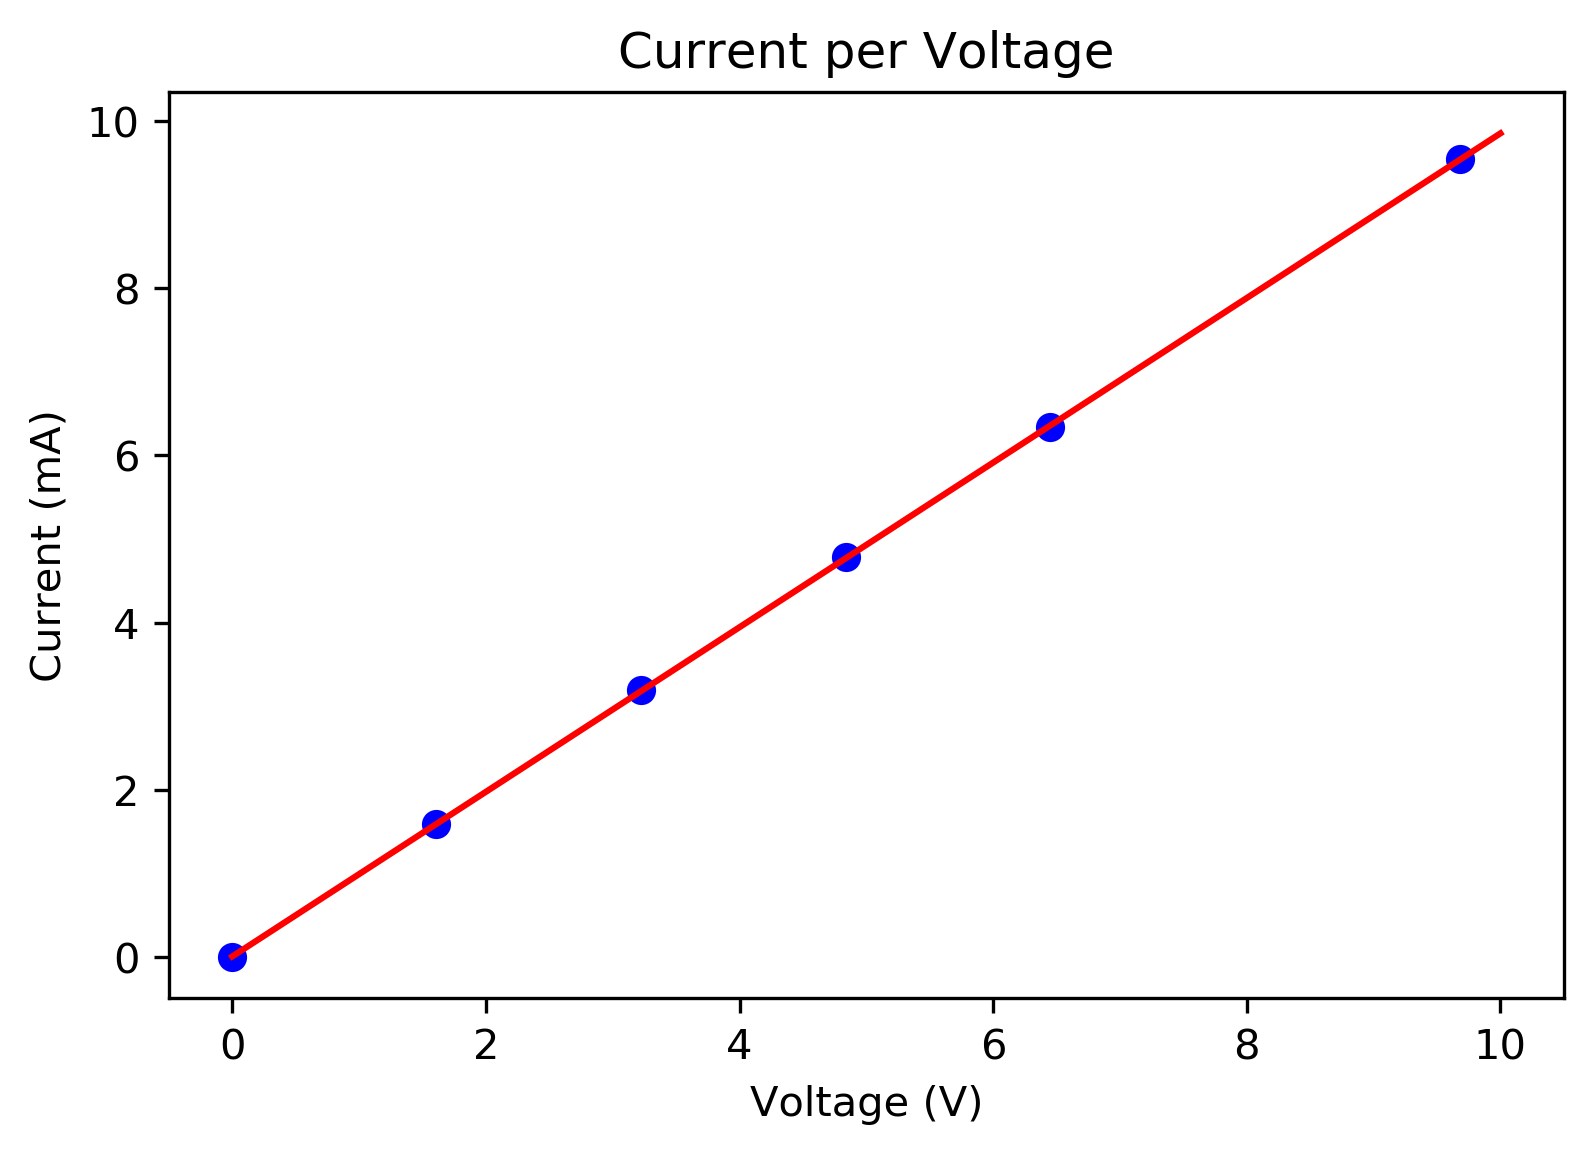

In [7]:
# Plotting the data points and the line of best fit on a graph
xspace = np.linspace(0,10,1000)
plt.figure(dpi=300)
plt.title('Current per Voltage')
plt.ylabel('Current (mA)')
plt.xlabel('Voltage (V)')
plt.plot(V, mA, "bo")
plt.plot(xspace, [fitparams[0]*x**1+fitparams[1] for x in xspace], "r-")

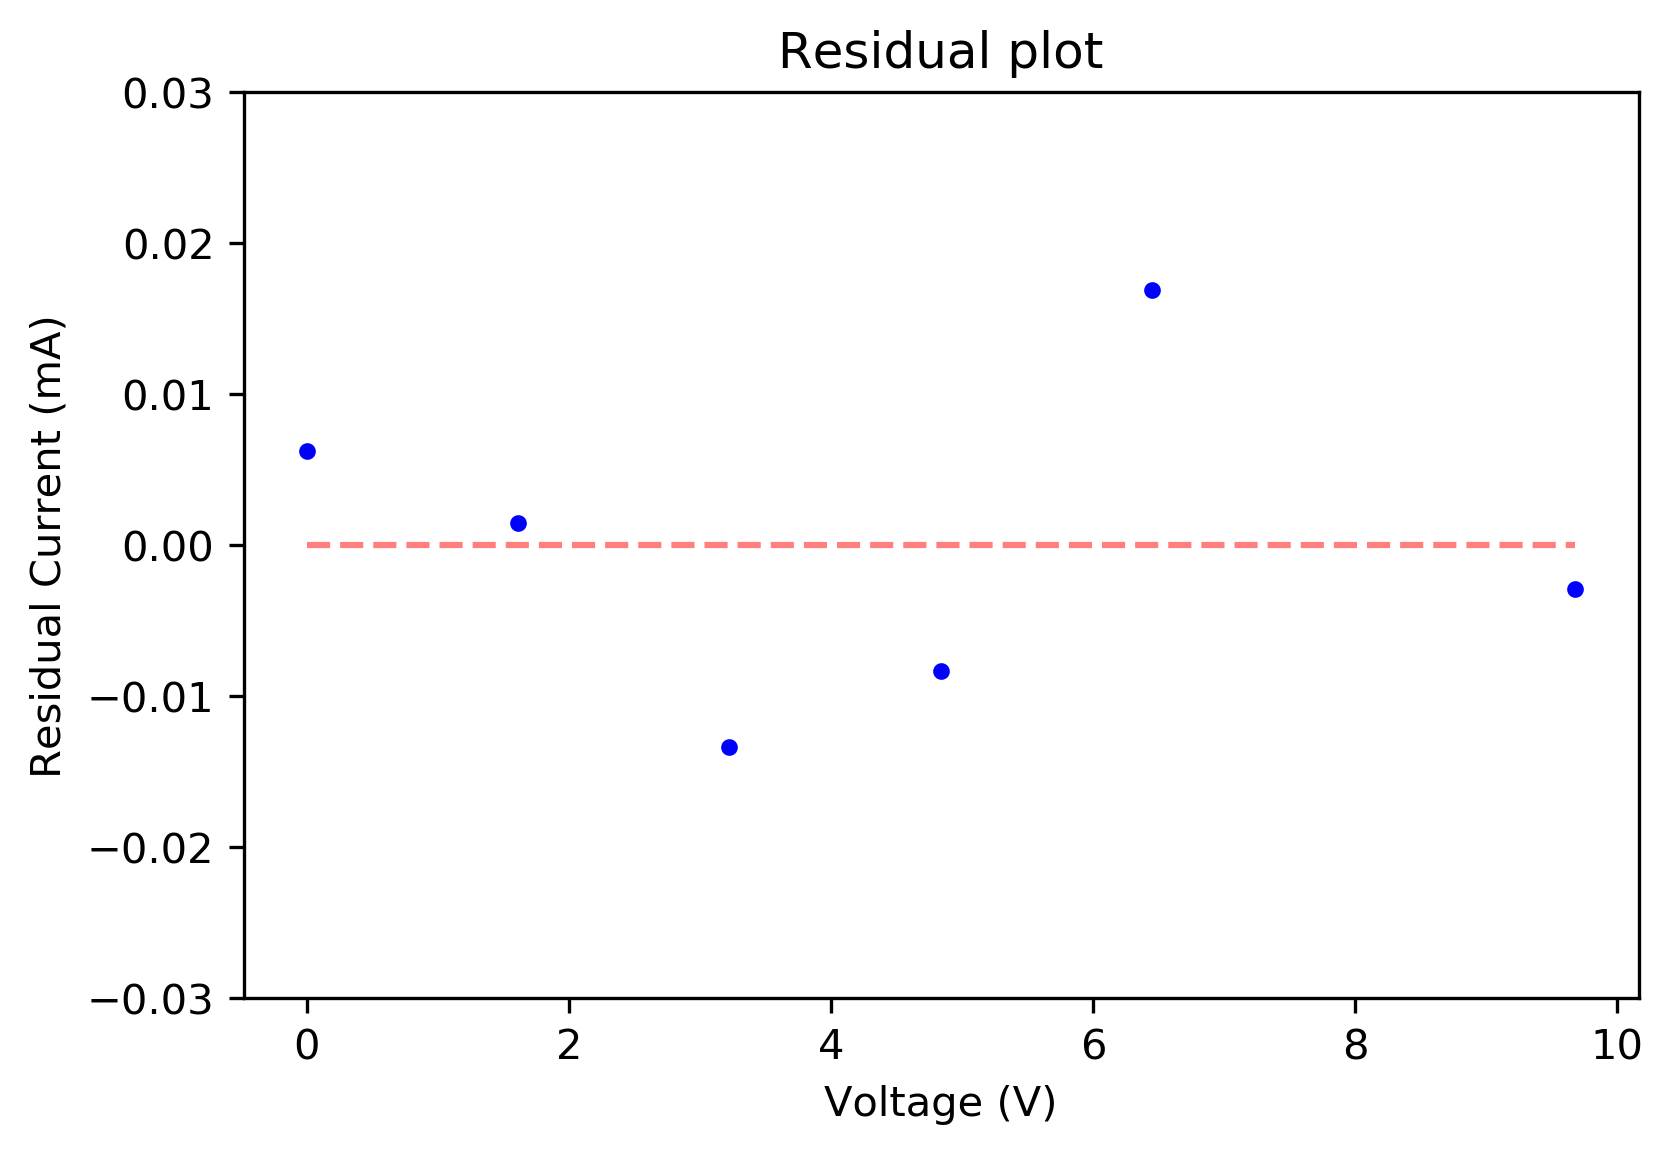

In [8]:
# Plotting the residual of all the data points
plt.figure(dpi=300)
plt.ylim(ymin=-0.03, ymax=0.03)
plt.title('Residual plot')
plt.ylabel('Residual Current (mA)')
plt.xlabel('Voltage (V)')
plt.plot(V, res, "b.")
plt.plot(V, np.zeros(6), "r--", alpha=0.5)

In [9]:
# Using the standard deviation of the residuals as the uncertainty of the measurements
print("Uncertainty: " + str(np.std(res)))

Uncertainty: 0.009848733565913627


#### Uncertainty
The uncertainty in the measurements given by the standard deviation of the residuals is ~0.01 mA, which is very close to the uncertainty given by the multimeter.

#### Resistance calculation
According to Ohm's Law, V=IR. Therefore, R = V/I = 1/slope. Given that the slope of the line of best fit is .98 mA/V, R ~ 1.02 kΩ.

## 9/8/2020 
### Brandon Weiss, Pranav Charvu, Ethan Wu, Michael Topper
# Diode experiment

Hypothesis: 
Based on the Sockley diode equation, the current will increase exponentially with voltage.

Procedure:
1. Hook up the circuit as shown in the circuit diagram below.
2. Measure voltage drop across the diode by hooking up the digital multimeter in parallel.
3. Measure current by hooking up the digital multimeter in series with the diode and resistor.

In [10]:
# Reading was too low to measure current with 1 AA battery
Vbat = [0.00, 1.61, 3.22, 4.83, 6.45, 9.67]
Vdio = [0.00, 1.61, 2.63, 2.71, 2.75, 2.83]
mA2 = [0.00, 0.00, 0.534, 2.10, 3.63, 6.74]

In [11]:
# A table showing the data points
mytable = pd.DataFrame(zip(Vbat, Vdio, mA2), columns=['Voltage of battery (V)', 'Voltage across diode (V)', 'Current (mA)'])
mytable

,Voltage of battery (V),Voltage across diode (V),Current (mA)
0,0.00,0.00,0.000
1,1.61,1.61,0.000
2,3.22,2.63,0.534
3,4.83,2.71,2.100
4,6.45,2.75,3.630
5,9.67,2.83,6.740


### Images of the setup

The first image shows the setup to measure the voltage drop across the diode, the second image shows the setup to measure the current.

<img src="Asetup.jpg">

<img src="Vsetup.jpg">

### Circuit diagram

<img src="Circuit.PNG">

In [12]:
# Define a function to generate the exponential fit
def fit2(x, A, B):
    return A*(np.exp(B*x) - 1)

In [18]:
# Getting the coefficients to the fit
guess = (1.0, 7.0)
fitparams2, covars2 = curve_fit(fit2, Vdio, mA2, p0=guess)
print("Parameters: " + str(fitparams2))
print(covars2)
# fitparams2[0] = coefficient in mA = Is, fitparams2[1] = dimensionless multiplier = 1/(n*Vt)
# fitparams2[0] error is 8.31e-22, fitparams2[1] error is 8.26e-01

Parameters: [1.13037262e-11 9.58690376e+00]
[[ 8.30631534e-22 -2.61940081e-11]
 [-2.61940081e-11  8.26252591e-01]]


In [14]:
def calcRes2(x, y, fit):
    res = np.subtract([fit[0]*(np.exp(z*fit[1])-1) for z in x], y)
    return res
res2 = calcRes2(Vdio, mA2, fitparams2)

In [15]:
# Using the standard deviation of the residuals as the uncertainty of the measurements
print("Uncertainty: " + str(np.std(res2)) + " mA")

Uncertainty: 0.2689719096067204 mA


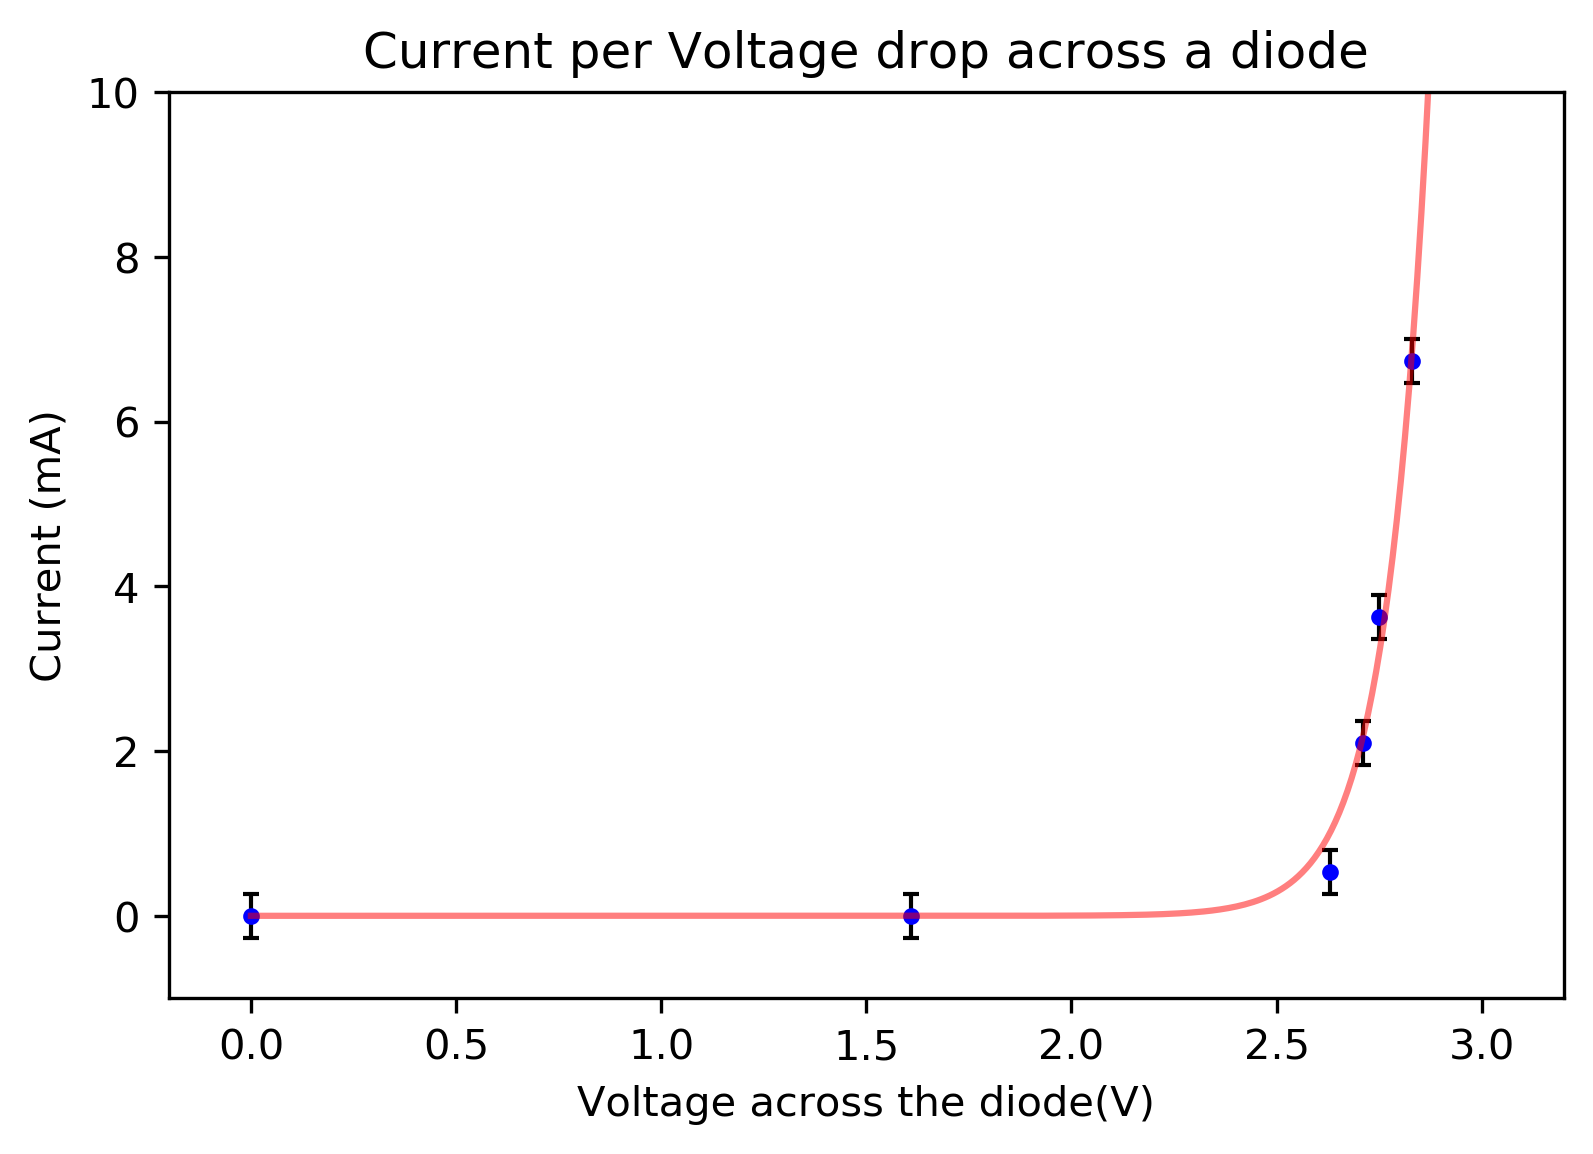

In [16]:
# Plotting the data points, the exponential line of best fit on a graph, and error bars for the points
xspace2 = np.linspace(0,10,1000)
plt.figure(dpi=300)
plt.ylim(-1, 10)
plt.xlim(-0.2,3.2)
plt.title('Current per Voltage drop across a diode')
plt.ylabel('Current (mA)')
plt.xlabel('Voltage across the diode(V)')
plt.plot(Vdio, mA2, "b.")
plt.errorbar(Vdio, mA2, np.std(res2), ls='none', color='black', capsize=2, elinewidth=1)
plt.plot(xspace2, [fitparams2[0]*(np.exp(x*fitparams2[1])-1) for x in xspace], "r-", alpha=0.5)

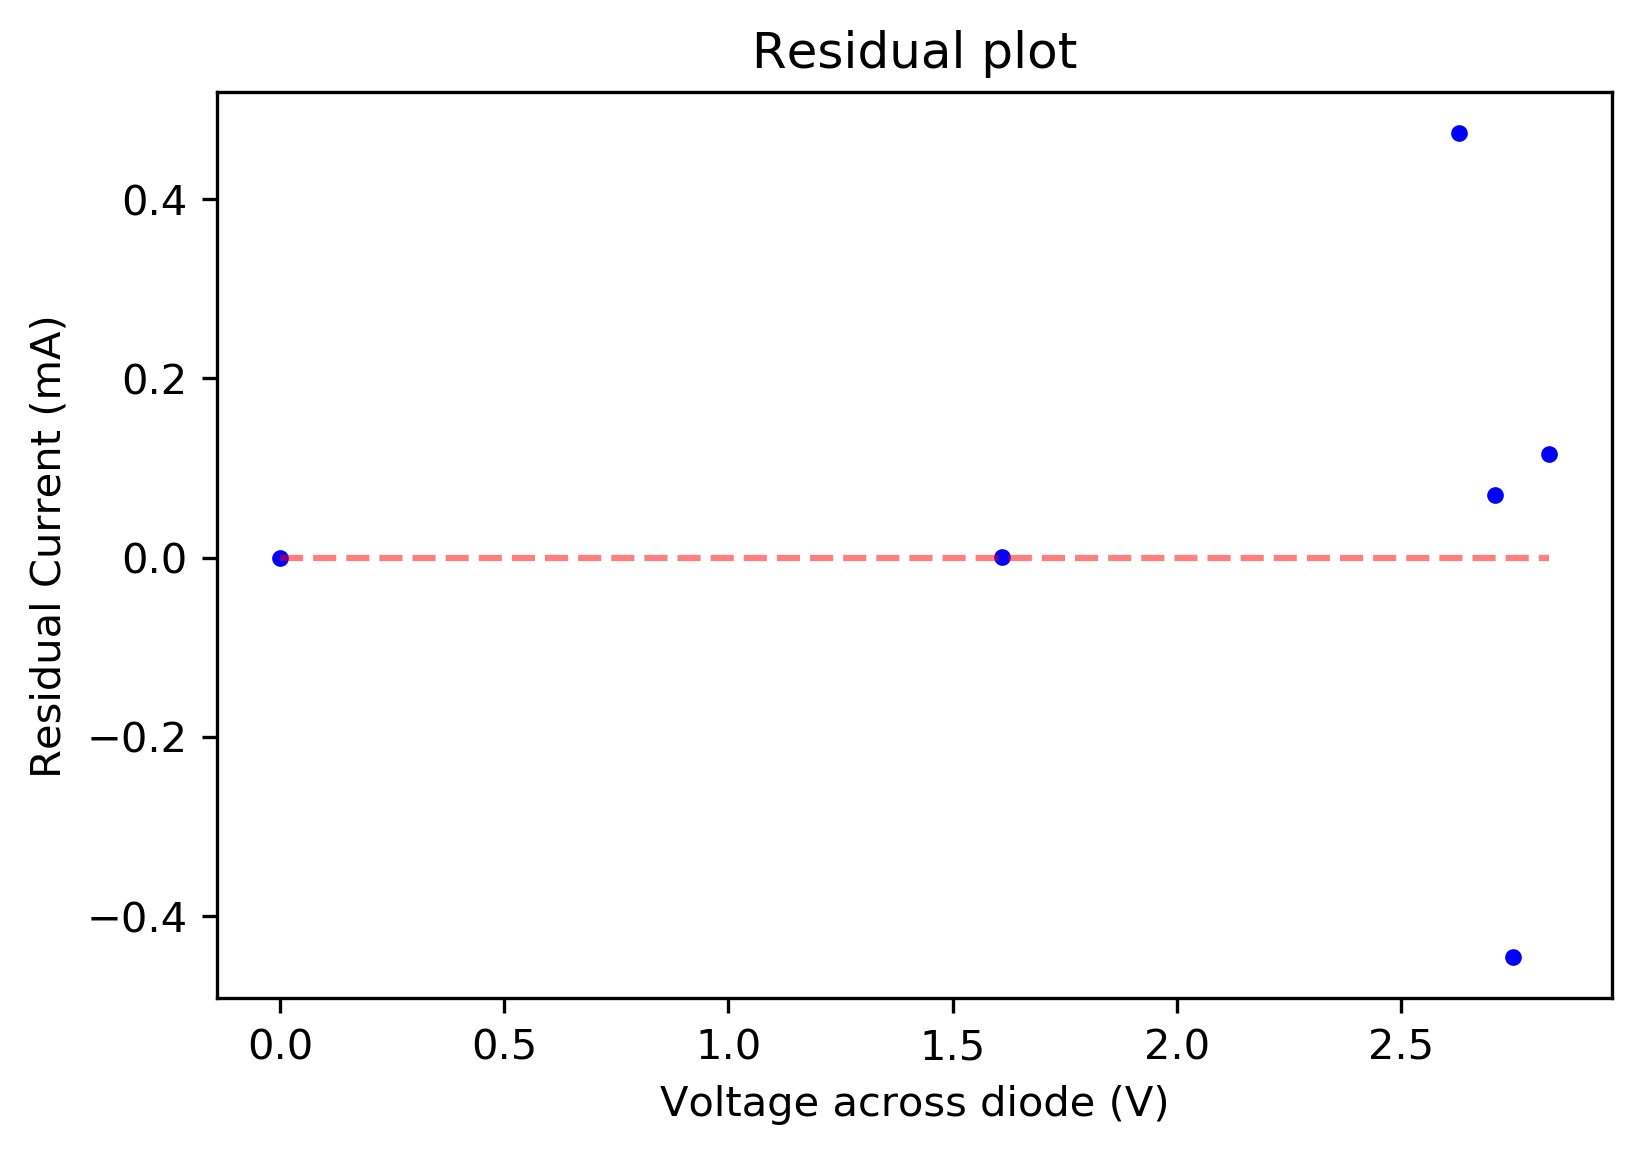

In [17]:
# Plotting the residual of all the data points
plt.figure(dpi=300)
plt.title('Residual plot')
plt.ylabel('Residual Current (mA)')
plt.xlabel('Voltage across diode (V)')
plt.plot(Vdio, res2, "b.")
plt.plot(Vdio, np.zeros(6), "r--", alpha=0.5)

#### Discussion

The first graph shows the exponential relationship between the voltage drop across a diode and current. The equation is $I = 1.13037262\times10^{-11}(e^{9.58690376*V} - 1)$.

The second graph shows the residuals of the data points vs the fit plot. The uncertainty in the current is the standard deviation of the residuals: 0.27 mA.